## 31. Аппроксимация данных. Логистическая функция. 
[Weiner B. Discovering Psychology. 1977]

В таблице представлены средние значения количества слов $y$, которыми владеет ребенок в заданном возрасте $x$.
```
 1.0        3
 1.5       22
 2.0      272
 2.5      446
 3.0      896
 3.5     1222
 4.0     1540
 4.5     1870
 5.0     2072
 6.0     2562
```
Построить линейную $y = \beta_0 + \beta_1 x$ и две логистические модели: 
$$
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 t}},
\qquad
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 (t - t_0)}},
$$
аппроксимирующие данные.    
Найти общую ошибку в каждом из этих случаев и сравнить результаты.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import linalg
from scipy import optimize

# Данные и построение графиков
```
x - возраст.
y - среднее количество слов в зависимоти от возраста.
```

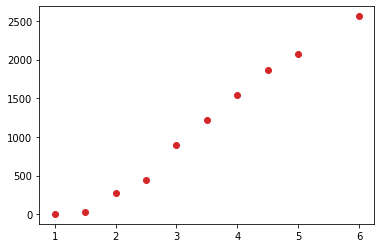

In [2]:
x = np.array([1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0])
y = np.array([3,22,272,446,896,1222,1540,1870,2072,2562])
m = len(x)
plt.plot(x,y,'o',color = 'tab:red')
pass

Используемые функции:

In [3]:
def funOne(t, b0,b1):
    return b0 + t * b1

In [4]:
def funTwo(t, b0,b1,b2):
    return b0 / (1 + b1 * np.exp(-b2 * t))

In [5]:
def funThree(t,t0,b0, b1,b2):
    return b0 / (1 + b1 * np.exp(-b2 * (t - t0)))

# Подбор значения параметров
Первая модель является линейной, поэтому использую функцию polyfit().

In [6]:
A = np.polyfit(x, y, 1)
A2, A1 = A
A1, A2

(-763.8571428571419, 561.9264069264067)

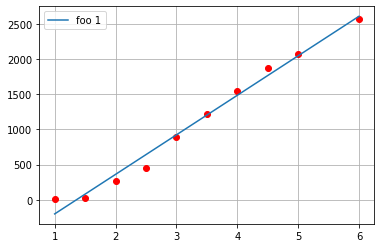

In [7]:
t = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'ro')
plt.plot(t, funOne(t,A1,A2), label='foo 1')
plt.legend()
plt.grid()
pass

## Нейлинейный метод наименьших квадратов
Для второй и третьей модели я использую метод наименьших квадратов. Реализация есть в функции curve_fit модуля numpy.optimize.

In [8]:
S1 = [1,2,3]
Param1, _ = optimize.curve_fit(funTwo, x, y, S1)
B0, B1, B2 = Param1
B0, B1, B2

(2612.693117576391, 95.76932605651045, 1.2364085878085078)

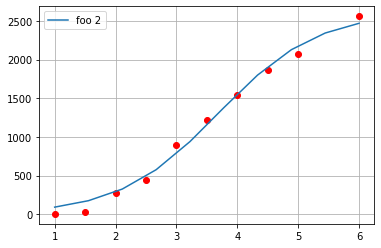

In [9]:
t = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'ro')
plt.plot(t, funTwo(t, B0, B1, B2), label='foo 2')
plt.legend()
plt.grid()
pass

In [10]:
S2 = [1, 2, 1000, 0.000001]
Param2, _ = optimize.curve_fit(funThree, x, y, S2, maxfev = 1000)
y0, C0, C1, C2 = Param2
y0, C0, C1, C2

(1.2856394374611508, 2612.692705797321, 19.538236709446767, 1.2364130098739303)

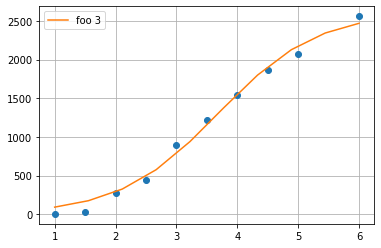

In [11]:
t = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(t, funThree(t,y0, C0,  C1, C2), label='foo 3')
plt.legend()
plt.grid()
pass

все три модели построим на одной координатой плоскости для сравнения

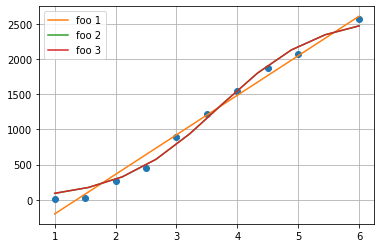

In [12]:
t = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(t, funOne(t,A1,A2), label='foo 1')
plt.plot(t, funTwo(t, B0, B1, B2), label='foo 2')
plt.plot(t, funThree(t,y0, C0,  C1, C2), label='foo 3')
plt.legend()
plt.grid()
pass

# Общая ошибка в каждом из этих случаев

In [13]:
err1 = np.array (y - funOne(x, A1, A2))**2
np.sum(err1)/m

10903.27748917749

In [14]:
err2 = np.array (y - funTwo(x, B0,B1,B2))**2
np.sum(err2)/m

6971.830188795667

In [15]:
err3 = np.array (y - funThree(x, y0, C0,C1,C2))**2
np.sum(err3)/m

6971.830194447544

# Вывод
1) Логистичекие модели лучше апроксимируют, чем линейная. Это видно на графиках.
2) Обе логистические модели одинаково  аппроксимируют  данные.